In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

In [12]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[0][1]*mi - intercept)/coef[0][0]), mi],[((-coef[0][1]*ma - intercept)/coef[0][0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

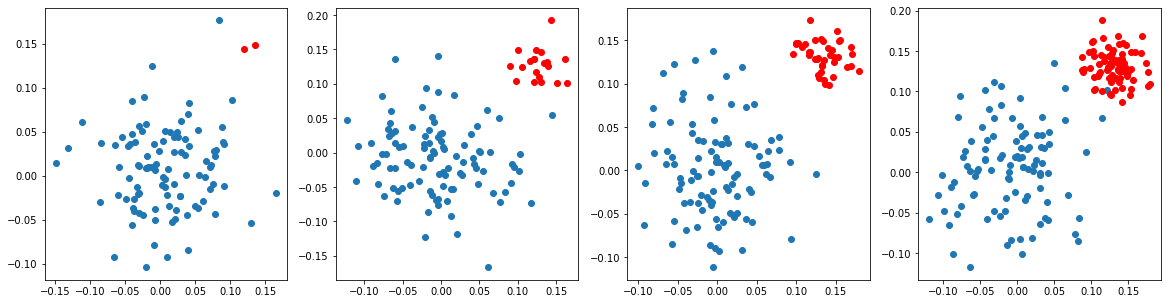

In [13]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [14]:
#you can start writing code here.

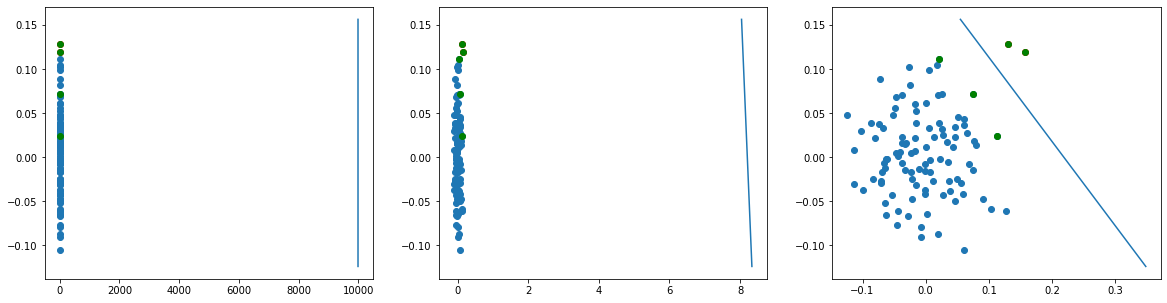

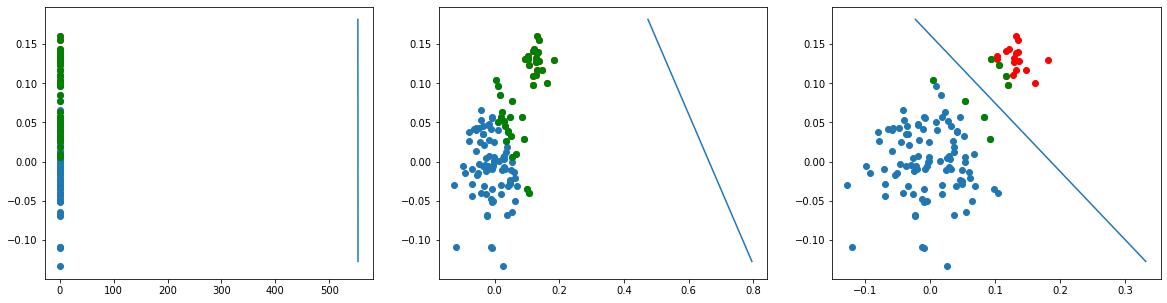

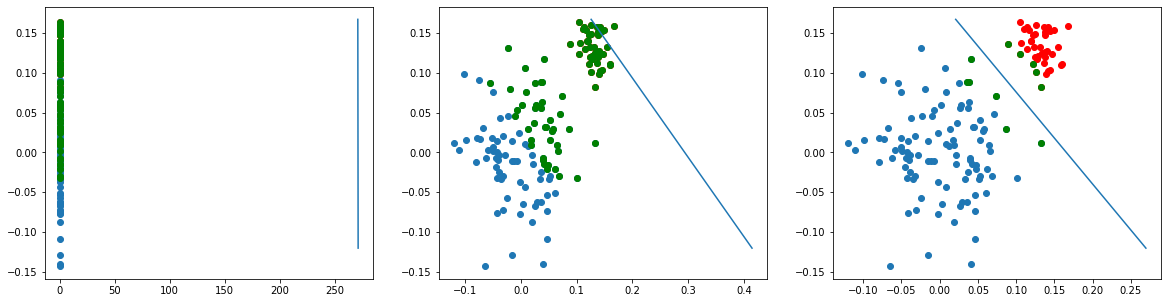

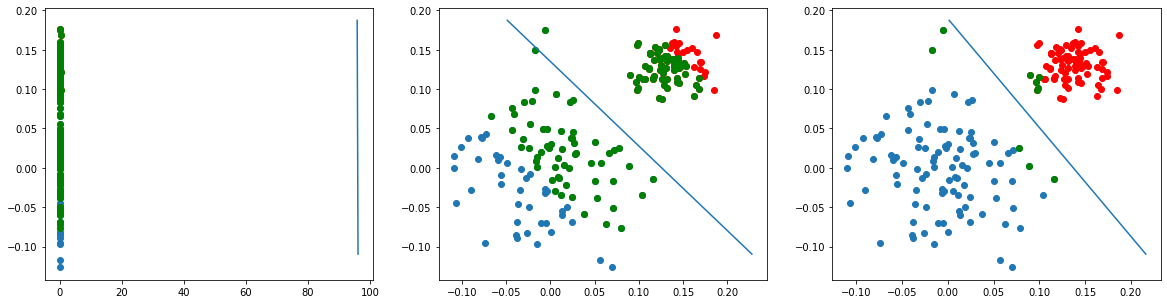

In [15]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
for j,i in enumerate(ratios):
    plt.figure(figsize=(20,5))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    n=0
    for c in  [0.001, 1, 100]:
        
        plt.subplot(1, 3, n+1)
        n=n+1
        clf = SVC(C=c,kernel='linear')
        clf.fit(X, y)
        coef=clf.coef_
        intercept=clf.intercept_
        mi=np.min(X[:, 0])
        ma=np.max(X[:, 0])
        draw_line(coef,intercept,mi,ma)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],color='green')
    plt.show()

In [16]:
a=clf.support_vectors_
print(a)

[[ 0.09786076  0.09887965]
 [ 0.10002155  0.11478962]
 [ 0.09869825  0.10108257]
 [ 0.08959839  0.11845708]
 [ 0.09686854  0.10953407]
 [ 0.08895938  0.00282432]
 [-0.01699336  0.14936895]
 [ 0.07765169  0.02528055]
 [ 0.11595346 -0.01375214]
 [-0.0055533   0.17482505]]


In [17]:
clf.predict(a)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [18]:
clf = LogisticRegression(random_state=0).fit(X, y)

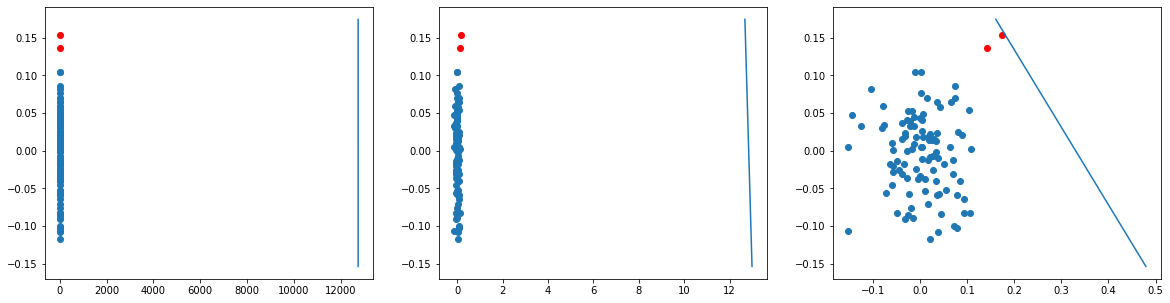

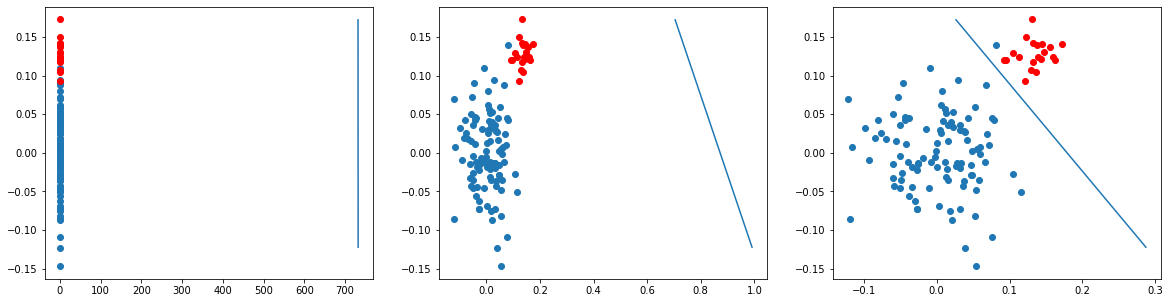

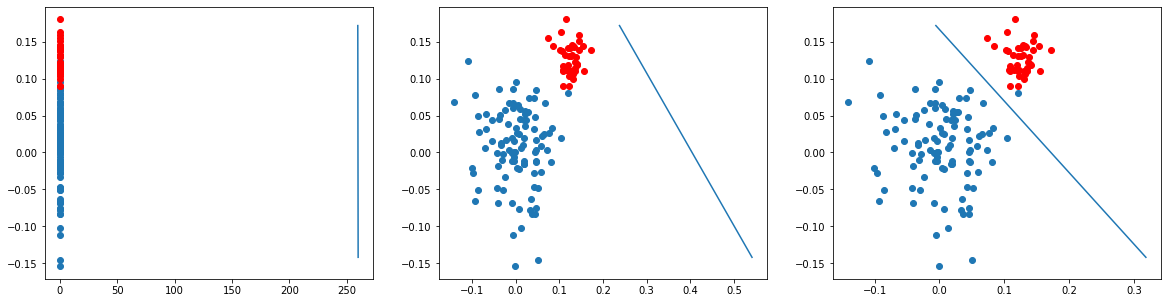

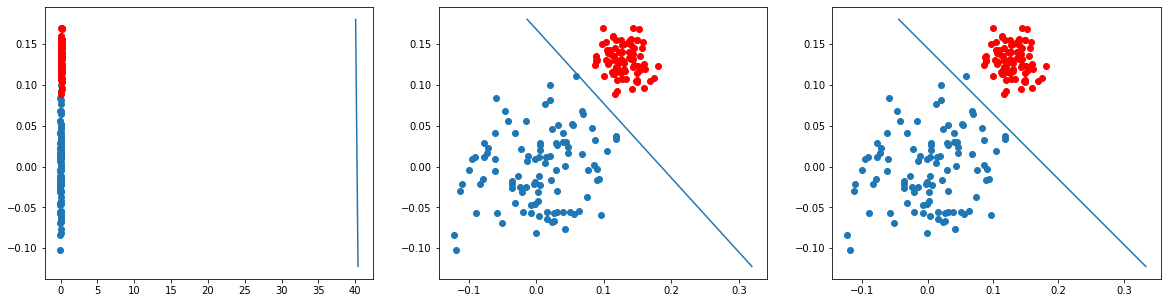

In [19]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
for j,i in enumerate(ratios):
    plt.figure(figsize=(20,5))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    n=0
    for c in  [0.001, 1, 100]:
        
        plt.subplot(1, 3, n+1)
        n=n+1
        clf = LogisticRegression(C=c,random_state=0).fit(X, y)
        clf.fit(X, y)
        coef=clf.coef_
        intercept=clf.intercept_
        mi=np.min(X[:, 0])
        ma=np.max(X[:, 0])
        draw_line(coef,intercept,mi,ma)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
    plt.show()

##Obsevation
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. Observe how hyper plane is changs according to change in your learning rate.
3. We have created 4 random datasets which are linearly separable and having class imbalance
4. In the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
5. For data set 1st 100:2 if c=0.001 both class of the dataSet is of the same side, and for c=1 still point is in the same side but hyper plane shifted towards the points and when c=100 the positive and negative class get seperated our model get started overfitting, because it try to classify every single point but in the logistic regression for c=100 model is still not overfitting.
6. For DataSet=100:40 the data is still imbalanced, In this case the model with c=100 will seperate both classes.so less than c=100 is underfitting the model,but if data is balanced in case of 100:80 then even model with c=1 work well.
7.Hence for linear model imbalanced data effect the model.To classify the imbalanced data we have to use the higher value of c that will cause the model overfitting.



